In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import re

In [81]:
df = pd.read_csv('mental_health.csv')

# Renomeia o nome das colunas para nomes mais curtos
columns_mapping = {}
with open('variable_mapping.json', 'r') as file:
    columns_mapping = json.load(file)

df.rename(columns=columns_mapping, inplace=True)

## 1 Feature Engineering

### Idade e Genero

In [82]:
def age_gender_featuring(df: pd.DataFrame):
    
    # Ajeitando a idade
    try:
        # Converte todos os valores para numéricos e substitui os 'erros' para nan
        df['idade'] = pd.to_numeric(df['idade'], errors='coerce')

        condition = (df['idade'] < 18) | (df['idade'] > 100)
        df['idade'] = np.where(condition, np.nan, df['idade'])

    except KeyError:
        print(f"Erro: A coluna 'idade' não existe no DataFrame.")
    
    except ValueError:
        print(f"Erro: Dados inválidos na coluna idade")

    # Ajeitando o genero
    try:    
        gender_mapping = {}
        with open('gender_mapping.json', 'r') as file:
            gender_mapping = json.load(file)

        df['genero'] = df['genero'].astype(str)
        df['genero'] = df['genero'].apply(lambda x: re.sub(r'\d+', '', x))
        df['genero'] = df['genero'].str.lower().map(gender_mapping).fillna('Other')
    
    except KeyError:
        print(f"Erro: A coluna genero não existe no DataFrame.")
    
    except ValueError:
        print(f"Erro: Dados inválidos na coluna gender")

    
    # Gráfico
    df_ = df.dropna(subset=['idade'])

    sns.set(style='white', font_scale=1.0)

    # Parameters
    title = 'Dist. Idade por Gênero'
    x_axis = 'idade'
    x_label = 'Idade'
    hue = 'genero'
    
    custom_pallete = {'M': 'indigo', 'F': 'limegreen', 'Other': 'thistle'}
    sns.histplot(data=df_, x=x_axis, hue=hue, kde=True, palette=custom_pallete)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Contagem')

    plt.tight_layout()
    save_path = 'dist_idade_sexo.png'
    plt.savefig(save_path, dpi=300)
    plt.show()

    return df

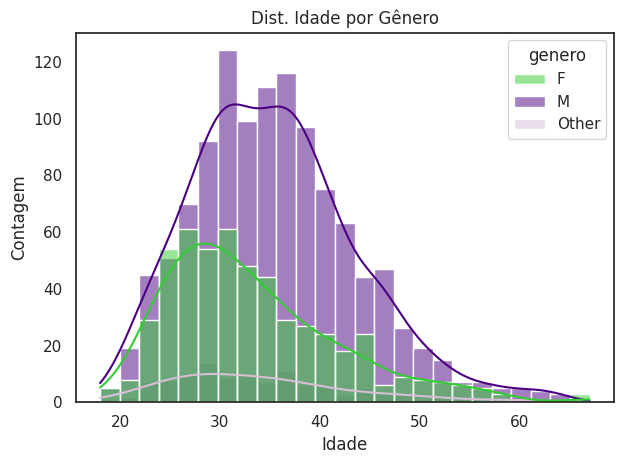

In [83]:
df_1 = age_gender_featuring(df)

In [84]:
df_1.columns

Index(['autonomo', 'num_func', 'emp_tec', 'papel_tec', 'beneficios_mental',
       'conhecimento_opcoes_mental',
       'Seu empregador já discutiu formalmente a saúde mental (por exemplo, como parte de uma campanha de bem -estar ou outra comunicação oficial)?',
       'recursos_aprendizado_mental', 'anonimato_protegido',
       'dificuldade_licenca_mental', 'conforto_conversar_saude',
       'conforto_discutir_supervisor', 'discussao_saude_mental_emp',
       'conforto_discutir_colegas', 'discussao_saude_mental_colegas',
       'discussao_saude_mental_colegas_outro', 'importancia_saude_fisica_emp',
       'importancia_saude_mental_emp', 'emp_tec_anterior',
       'disposto_discutir_supervisor', 'disturbio_saude_mental_atual',
       'disturbio_saude_mental_passado', 'tratamento_profissional_mental',
       'historico_familiar_mental', 'interferencia_tratamento_eficaz',
       'interferencia_sem_tratamento_eficaz', 'observacoes_discussao_mental',
       'disposto_compartilhar_amigos_fa

## Outras colunas

In [85]:
# Conversão para valoes inteiros
df_1['emp_tec'] = df_1['emp_tec'].map({'True': 1, 'False': 0})
df_1['emp_tec'] = pd.to_numeric(df_1['emp_tec'], errors='coerce')
df_1['emp_tec'].unique()

array([nan,  1.,  0.])

In [86]:
df_1['papel_tec'] = df_1['papel_tec'].map({'True': 1, 'False': 0})
df_1['papel_tec'] = pd.to_numeric(df_1['papel_tec'], errors='coerce')
df_1['papel_tec'].unique()

array([nan,  1.,  0.])

### Feature Importance

In [87]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import shap
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_predict

# # Assuming you have a dataframe named 'df' with features and a target column
# # 'X' contains the feature columns

# target = 'Você atualmente tem um distúrbio de saúde mental?'
# X = df.drop(columns=target, axis=1)

# # 'y' contains the target column
# y = df[target]

# # Create a Random Forest classifier
# rf = RandomForestClassifier()

# # Perform cross-validated predictions
# y_pred = cross_val_predict(rf, X, y, cv=5, n_jobs=-1)

# # Fit the classifier to the entire dataset
# rf.fit(X, y)

# # Initialize a SHAP explainer
# explainer = shap.Explainer(rf)

# # Calculate SHAP values for all features based on the entire dataset
# shap_values = explainer(X)

# # Calculate feature importances based on mean absolute SHAP values
# feature_importances = pd.DataFrame(
#     list(zip(X.columns, shap_values.abs().mean(0))),
#     columns=['Feature', 'Importance']
# )

# # Sort the dataframe by importance in descending order
# feature_importances = feature_importances.sort_values('Importance', ascending=False)

# # Print the feature importance ranking
# print(feature_importances)

# # Plot feature importances
# plt.figure(figsize=(10, 6))
# plt.bar(feature_importances['Feature'], feature_importances['Importance'])
# plt.xticks(rotation=90)
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.title('Feature Importance (SHAP)')
# plt.tight_layout()
# plt.show()
